# Project: final_project - [No-show appointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#cleanning_summary">Cleanning Summary</a></li>    
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> i will go through the No-show appointments dataset , this data has information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. it has columns like :
   - PatientId
   - AppointmentID
   - Gender
   - ScheduledDay  : tells us on what day the patient set up their appointment.
   - AppointmentDay :The day someone called or registered the appointment, this is before appointment of course.
   - Age
   - Neighbourhood  :  indicates the location of the hospital.
   - Scholarship    :  indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
   - Hipertension
   - Diabetes
   - Alcoholism
   - Handcap
   - SMS_received
   - No-show        : the output
       - note : Be careful about the the output: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.
### Question(s) for Analysis
>  - What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?
   - which gender is more to  show
   - what age is more to  attend
   - is there a relation between the AppointmentDay and to  show
   - is there a relation between ScheduledDay, AppointmentDay and not to show , may be the ScheduledDay is too far or too early?
   - if sending a SMS has a relation with no to show

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_column',None)

In [2]:
plt.rcParams['figure.figsize']=[17,8]
plt.rcParams['font.size']=20
plt.rcParams['figure.titlesize']='medium'

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [3]:
df= pd.read_csv('noshowappointments.csv')

In [4]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [5]:
df.shape

(110527, 14)

In [6]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PatientId,110527,NaN,NaN,NaN,1.47496e+14,2.56095e+14,39217.8,4.17261e+12,3.17318e+13,9.43917e+13,9.99982e+14
AppointmentID,110527,NaN,NaN,NaN,5.67531e+06,71295.8,5.03023e+06,5.64029e+06,5.68057e+06,5.72552e+06,5.79048e+06
Gender,110527,2,F,71840,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ScheduledDay,110527,103549,2016-05-06T07:09:54Z,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AppointmentDay,110527,27,2016-06-06T00:00:00Z,4692,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,110527,NaN,NaN,NaN,37.0889,23.1102,-1,18,37,55,115
Neighbourhood,110527,81,JARDIM CAMBURI,7717,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Scholarship,110527,NaN,NaN,NaN,0.0982656,0.297675,0,0,0,0,1
Hipertension,110527,NaN,NaN,NaN,0.197246,0.397921,0,0,0,0,1
Diabetes,110527,NaN,NaN,NaN,0.0718648,0.258265,0,0,0,0,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


# summary :
> - we know that there were a date columns so we had to take it with consideration when load the data so i passed and addition argument with read_csv which is parse_dates in which we give a list with the columns that has date in it
- it seems that there is no missing values but we can see from the discribe of the age that the min age is -1 and also a max of 115 which can not happen so we need to cleen that
- there is no wrong data types
- there are columns that we need to drop

# cleanning:

> i will start by renaming the column so it will be easy to access

In [8]:
df.rename(columns= lambda x: x.lower(),inplace=True)

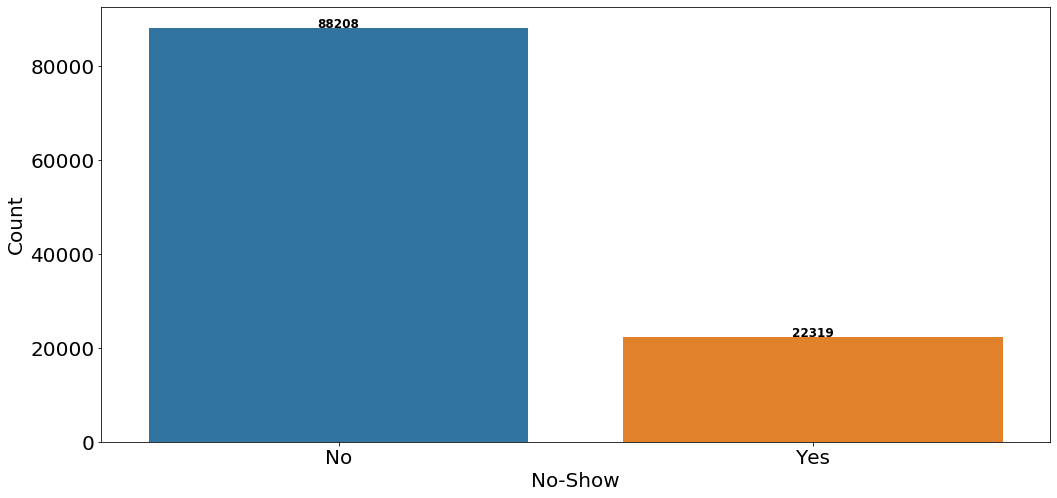

In [9]:
axes=sns.countplot(data=df,x='no-show')
for patch in axes.patches:
    loc = patch.get_x()
    width = patch.get_width()
    height = patch.get_height()
    axes.text(loc+width/2, height, str(height), fontsize=12, weight='bold', ha='center')
plt.xlabel('No-Show')    
plt.ylabel('Count');  

> before taking any action on cleaing i should notice that the data is not balanced the no is much more that yes

In [10]:
df.columns

Index(['patientid', 'appointmentid', 'gender', 'scheduledday',
       'appointmentday', 'age', 'neighbourhood', 'scholarship', 'hipertension',
       'diabetes', 'alcoholism', 'handcap', 'sms_received', 'no-show'],
      dtype='object')

> i will start my cleanning with age column
- i will start to see the distrubution of age and we see if there is outliers

In [11]:
df['age'].mean()

37.08887421173107

Text(0.5, 0, 'Age')

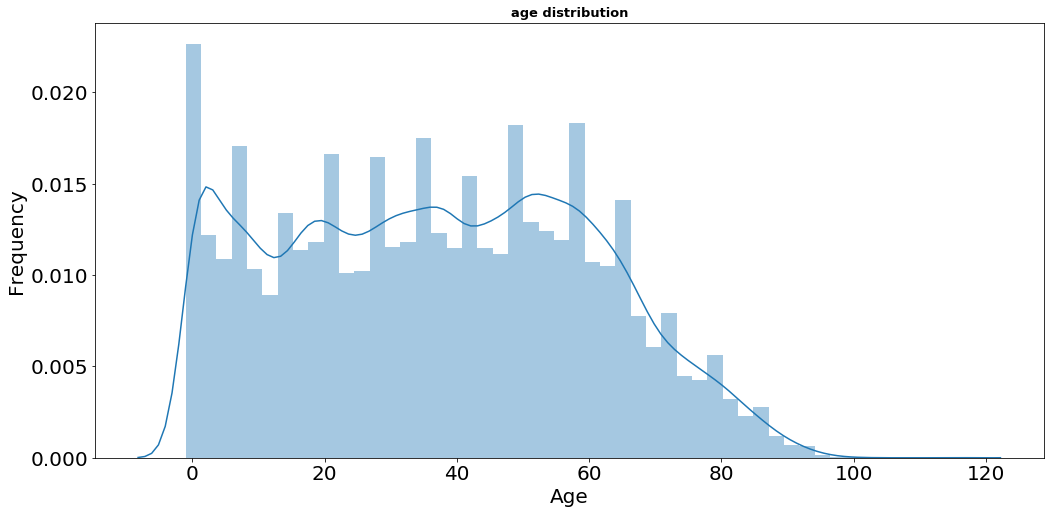

In [12]:
sns.distplot(df['age']);
plt.title('age distribution',fontsize=13,weight='bold')
plt.ylabel('Frequency')
plt.xlabel('Age')

Text(0, 0.5, 'Age')

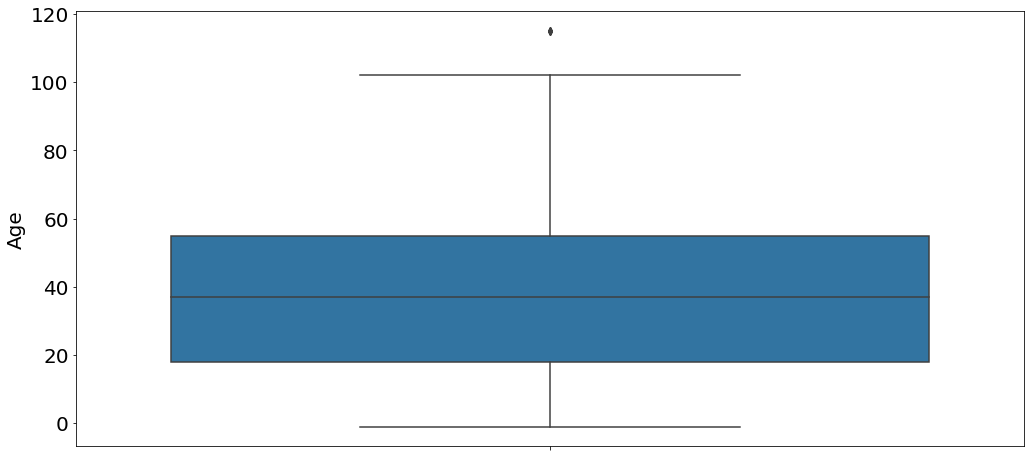

In [13]:
sns.boxplot(data=df,y='age');
plt.ylabel('Age')

> from boxplot and distplot i get that there is outliers where there is age > 100 and there is age with -ve which is imposible
- i will start by sperate the wrong age and work on them

In [14]:
age_wrong = df[(df['age']>100)|
              (df['age']<1)]
# i choise 1 because there may be an apointments for babies

In [15]:
age_wrong.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3547 entries, 59 to 110507
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   patientid       3547 non-null   float64
 1   appointmentid   3547 non-null   int64  
 2   gender          3547 non-null   object 
 3   scheduledday    3547 non-null   object 
 4   appointmentday  3547 non-null   object 
 5   age             3547 non-null   int64  
 6   neighbourhood   3547 non-null   object 
 7   scholarship     3547 non-null   int64  
 8   hipertension    3547 non-null   int64  
 9   diabetes        3547 non-null   int64  
 10  alcoholism      3547 non-null   int64  
 11  handcap         3547 non-null   int64  
 12  sms_received    3547 non-null   int64  
 13  no-show         3547 non-null   object 
dtypes: float64(1), int64(8), object(5)
memory usage: 415.7+ KB


# summary:
> i notice that there is wrong values for age like -1 and ages > 100 , so i will try to drop these outliers and work only in the age from 1 - 100
- but in droping i will drop only the rows with wrong age and has `no-show == No` because i have alot of lable `No` 
- but for the rows where `no-show == Yes` i will impute them
- so i will seperate the wrong rows first to age_wrong_no and age_wrong_yes

In [16]:
age_wrong_no= age_wrong[age_wrong['no-show']=='No']
age_wrong_yes=age_wrong[age_wrong['no-show']=='Yes']

In [17]:
age_wrong_no.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2905 entries, 59 to 110507
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   patientid       2905 non-null   float64
 1   appointmentid   2905 non-null   int64  
 2   gender          2905 non-null   object 
 3   scheduledday    2905 non-null   object 
 4   appointmentday  2905 non-null   object 
 5   age             2905 non-null   int64  
 6   neighbourhood   2905 non-null   object 
 7   scholarship     2905 non-null   int64  
 8   hipertension    2905 non-null   int64  
 9   diabetes        2905 non-null   int64  
 10  alcoholism      2905 non-null   int64  
 11  handcap         2905 non-null   int64  
 12  sms_received    2905 non-null   int64  
 13  no-show         2905 non-null   object 
dtypes: float64(1), int64(8), object(5)
memory usage: 340.4+ KB


In [18]:
age_wrong_yes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 642 entries, 104 to 110339
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   patientid       642 non-null    float64
 1   appointmentid   642 non-null    int64  
 2   gender          642 non-null    object 
 3   scheduledday    642 non-null    object 
 4   appointmentday  642 non-null    object 
 5   age             642 non-null    int64  
 6   neighbourhood   642 non-null    object 
 7   scholarship     642 non-null    int64  
 8   hipertension    642 non-null    int64  
 9   diabetes        642 non-null    int64  
 10  alcoholism      642 non-null    int64  
 11  handcap         642 non-null    int64  
 12  sms_received    642 non-null    int64  
 13  no-show         642 non-null    object 
dtypes: float64(1), int64(8), object(5)
memory usage: 75.2+ KB


In [19]:
df.groupby('age')['no-show'].value_counts().sort_values(ascending=False)

age   no-show
 0    No         2900
 1    No         1858
 52   No         1449
 56   No         1372
 2    No         1366
                 ... 
 102  No            2
 96   Yes           1
 98   Yes           1
 99   No            1
-1    No            1
Name: no-show, Length: 204, dtype: int64

## summary :
- after i saw the missing age with no-show and saw the huge number of missing age i notice that imput all this huge number may lead to bais in the data so i decided to drop the age where we have no-show is no because this label is much more the yes so dropping it will not cause huge problem and to imput the age with no-show = yes

In [20]:
df.drop(age_wrong_no.index,inplace=True)

>  i will drop the rows that has wrong age like -1 or > 100 and has `no-show == no` because i have a lot of lable no 
- and i will make sure that we still have enough data ofter dropping

In [21]:
df.shape
# we still have large data so every thing is okey so far

(107622, 14)

- next step is to see the rows with wrong age and `no-show == Yes ` so i can see how to impute them

In [22]:
age_wrong_yes['age'].unique()

array([  0, 115], dtype=int64)

> note age_wrong_yes has only two values of 0 and 115 and i have already droped the wrong age with `no-show == No` in the original data so i will also directily replace the values [0,115] in the original data with the mean of age

In [23]:
df['age'].replace([0,115],round (df['age'].mean()),inplace=True)# we round because age to be int
df['age'].unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   3,   1,  69,  68,  60,  67,  36,  10,  35,
        20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,  24,
        66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,  14,
         9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,  86,
        91,  98,  92,  96,  93,  95,  97, 100,  99], dtype=int64)

Text(0, 0.5, 'Age')

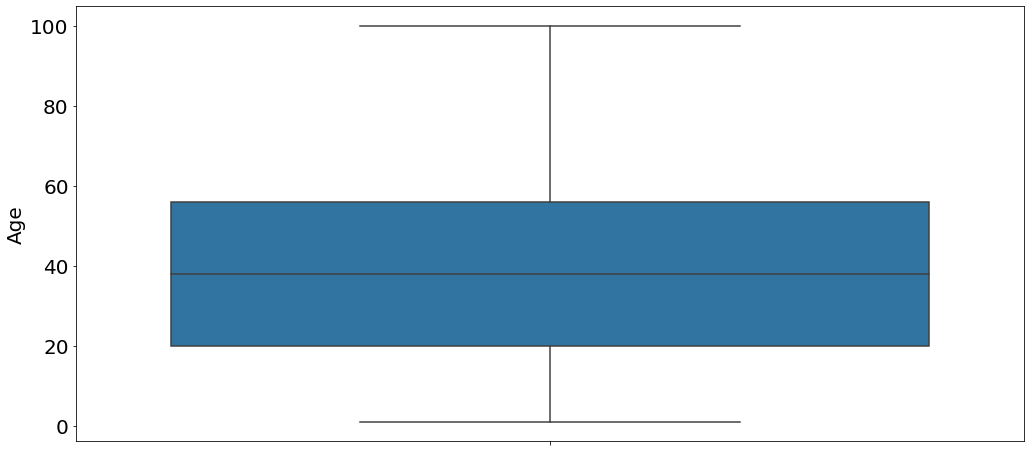

In [24]:
sns.boxplot(data=df,y='age');
plt.ylabel('Age')

> from this plot we can make sure that we had made the changes we want in age 

- now we will continue our cleanning by droping the useless columns

In [25]:
df.drop(['patientid','appointmentid'],axis=1,inplace=True)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 107622 entries, 0 to 110526
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   gender          107622 non-null  object
 1   scheduledday    107622 non-null  object
 2   appointmentday  107622 non-null  object
 3   age             107622 non-null  int64 
 4   neighbourhood   107622 non-null  object
 5   scholarship     107622 non-null  int64 
 6   hipertension    107622 non-null  int64 
 7   diabetes        107622 non-null  int64 
 8   alcoholism      107622 non-null  int64 
 9   handcap         107622 non-null  int64 
 10  sms_received    107622 non-null  int64 
 11  no-show         107622 non-null  object
dtypes: int64(7), object(5)
memory usage: 10.7+ MB


In [27]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
gender,107622,2,F,70433,NaN,NaN,NaN,NaN,NaN,NaN,NaN
scheduledday,107622,100900,2016-05-06T07:09:54Z,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
appointmentday,107622,27,2016-06-06T00:00:00Z,4556,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,107622,NaN,NaN,NaN,38.3095,22.3921,1,20,38,56,100
neighbourhood,107622,81,JARDIM CAMBURI,7619,NaN,NaN,NaN,NaN,NaN,NaN,NaN
scholarship,107622,NaN,NaN,NaN,0.1005,0.300667,0,0,0,0,1
hipertension,107622,NaN,NaN,NaN,0.202561,0.40191,0,0,0,0,1
diabetes,107622,NaN,NaN,NaN,0.0738046,0.261454,0,0,0,0,1
alcoholism,107622,NaN,NaN,NaN,0.0312204,0.173914,0,0,0,0,1
handcap,107622,NaN,NaN,NaN,0.0228299,0.163612,0,0,0,0,4


<a id='cleanning_summary'></a>
### Data Cleaning (summary!)
>- i changed the cloumn names to be lower case for easy use
- afeter seeing the distrubution and boxplot for age column i decided to remove any age that higher than 100 and less than 1 with `no-show == no` and to impute with mean the ones with `no-show == yes`
- we droped  `patientid,appointmentid` columns

<a id='eda'></a>
## Exploratory Data Analysis



### Research Question 1 (which gender is more to not show!)

Text(0.5, 1.0, 'gender ratio')

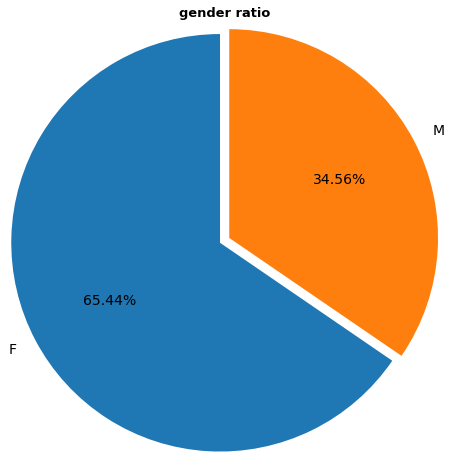

In [28]:
gender_count=df['gender'].value_counts()
plt.pie(gender_count,startangle=90,labels=gender_count.index,autopct='%.2f%%',textprops={'fontsize':14},radius=1.2,explode=[0.03,0.03]);
plt.title("gender ratio",fontsize=13,weight='bold')

Text(0.5, 1.0, 'gender count for show and no-show')

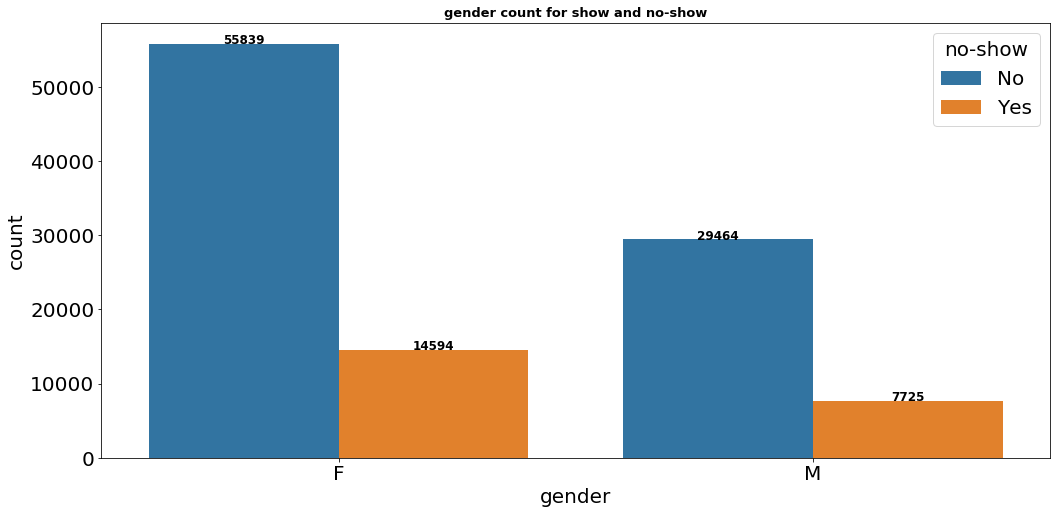

In [29]:
axes=sns.countplot(data=df,x='gender',hue='no-show');
for patch in axes.patches:
    loc = patch.get_x()
    width = patch.get_width()
    height = patch.get_height()
    axes.text(loc+width/2, height, str(height), fontsize=12, weight='bold', ha='center')
plt.title('gender count for show and no-show',fontsize=13,weight='bold')

- i will group by the gender and no-show to get the ratio of the gender the attend the appointment

In [30]:
gender_count_df=df.groupby(['gender','no-show'])['no-show'].size().unstack()
gender_count_df

no-show,No,Yes
gender,,
F,55839,14594
M,29464,7725


In [31]:
show_ratio = ((gender_count_df*100)/(gender_count_df.values.sum(axis=1).reshape(-1,1)))
show_ratio

no-show,No,Yes
gender,,
F,79.279599,20.720401
M,79.227729,20.772271


In [32]:
show_ratio = ((gender_count_df*100)/(gender_count_df.values.sum(axis=0)))
show_ratio

no-show,No,Yes
gender,,
F,65.459597,65.388234
M,34.540403,34.611766


> what i did was after grouping the gender and no-show i want to see the persentage of each gender to show and to not show , so i sum over the rows and by that i get the total number of show and no show and then i divided female/total_no , male/total_yes , female/total_yes , male/total_yes 
- by that i get the ratio of each gender and the show

> from above tables we can get that: 
 - gender don't affect showing up because all the ratio are the same

### functions

In [33]:
# i ganna use the bar code again so i will define a function for that
def drow_count (col):
    axes=sns.countplot(data=df,x=col,hue='no-show');
    for patch in axes.patches:
        loc = patch.get_x()
        width = patch.get_width()
        height = patch.get_height()
        axes.text(loc+width/2, height, str(height), fontsize=12, weight='bold', ha='center')

In [34]:
# i ganna make a function also for the pie
def drow_pie(x,tit):
    plt.pie(x,autopct='%.2f%%',labels=x.index,startangle=90,counterclock=False)
    plt.title(tit,weight='bold');

### Research Question 2  (what age is more to  attend!)
- i want to get the range of age that is most to show 
- the mean age to show anf the mean age no not show

In [35]:
age_show = df[df['no-show']=='No']['age']
age_no_show = df[df['no-show']=='Yes']['age']

Text(0.5, 0, 'Age')

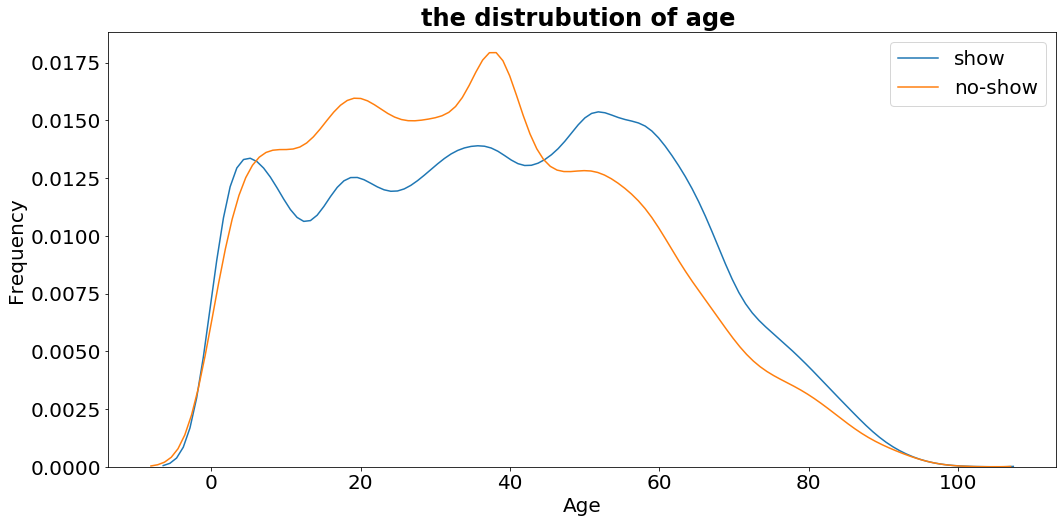

In [36]:
sns.distplot([age_show],hist=False,label='show');
sns.distplot(age_no_show,hist=False,label='no-show');
plt.title('the distrubution of age ',weight='bold')
plt.ylabel('Frequency')
plt.xlabel('Age')

> from this distrubution we can get that : 
 - from age 1 to 50 there is more chance to not attend the oppointment 
 - but from 50 to 100 there is more chance to attend the oppointment 

Text(0, 0.5, 'Age')

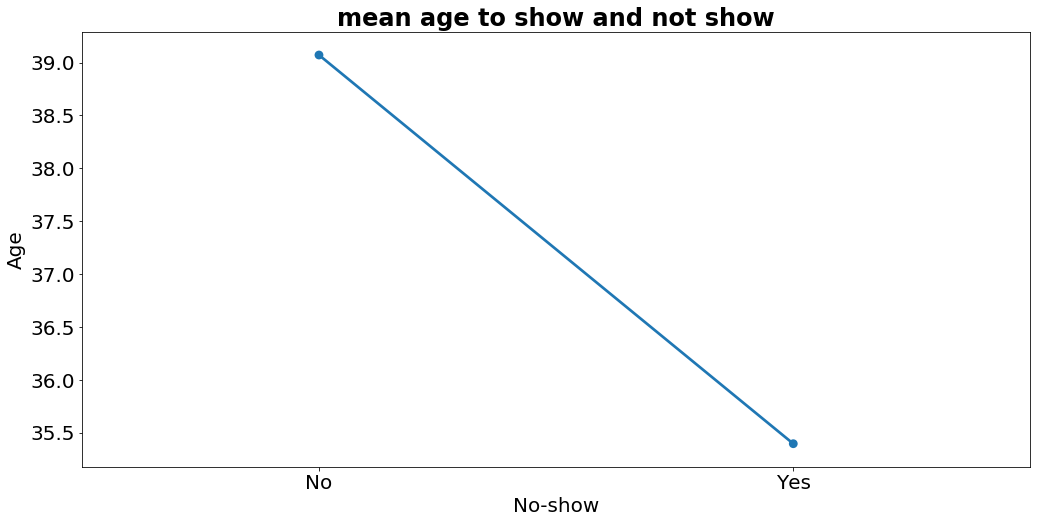

In [37]:
#sns.catplot(x='no-show',y='age',data=df,kind='point',ci=None,estimator=np.mean);
sns.pointplot(x='no-show',y='age',data=df,kind='point',ci=None,estimator=np.mean);
plt.title('mean age to show and not show',weight='bold')
plt.xlabel('No-show')
plt.ylabel('Age')

> - the average age for attending is 39 
- and for not attending is 35

### Research Question 4  (is there a relation between ScheduledDay, AppointmentDay !)

- i will first see if there is a wrong data to drop or not

In [38]:
scheduled_date=pd.to_datetime(df['scheduledday']).dt.date
appointment_date=pd.to_datetime(df['appointmentday']).dt.date

In [39]:
wrong_date=(scheduled_date > appointment_date)
wrong_date . value_counts()

False    107617
True          5
dtype: int64

> we have a wrong date when the scheduled_date is after the appointment_date which can not happen so we should drop this misslead data

In [40]:
wrong_date_df=df[wrong_date]
wrong_date_df

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show
27033,M,2016-05-10T10:51:53Z,2016-05-09T00:00:00Z,38,RESISTÊNCIA,0,0,0,0,1,0,Yes
55226,F,2016-05-18T14:50:41Z,2016-05-17T00:00:00Z,19,SANTO ANTÔNIO,0,0,0,0,1,0,Yes
64175,F,2016-05-05T13:43:58Z,2016-05-04T00:00:00Z,22,CONSOLAÇÃO,0,0,0,0,0,0,Yes
71533,F,2016-05-11T13:49:20Z,2016-05-05T00:00:00Z,81,SANTO ANTÔNIO,0,0,0,0,0,0,Yes
72362,M,2016-05-04T06:50:57Z,2016-05-03T00:00:00Z,7,TABUAZEIRO,0,0,0,0,0,0,Yes


- i was hopping  the no-show to be No so i can surly drop them because i already have unbalanced lables and have many No but it'a yes and i should drop them because i cant impute them with average date

In [41]:
df.drop(wrong_date_df.index,inplace=True)

In [42]:
df['scheduled_date']=pd.to_datetime(df['scheduledday']).dt.date
df['appointment_date']=pd.to_datetime(df['appointmentday']).dt.date
df['appointment_day']= pd.to_datetime(df['appointmentday']).dt.day_name()

### Research Question 3  (is there a relation between the AppointmentDay and to show!)

In [43]:
df['appointment_day']

0          Friday
1          Friday
2          Friday
3          Friday
4          Friday
           ...   
110522    Tuesday
110523    Tuesday
110524    Tuesday
110525    Tuesday
110526    Tuesday
Name: appointment_day, Length: 107617, dtype: object

In [44]:
appointment_day_counts=df['appointment_day'].value_counts().sort_values(ascending=False)
appointment_day_counts

Wednesday    25234
Tuesday      24956
Monday       22076
Friday       18561
Thursday     16751
Saturday        39
Name: appointment_day, dtype: int64

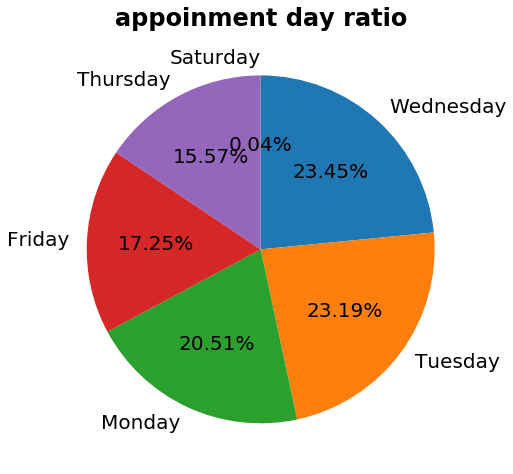

In [45]:
drow_pie(appointment_day_counts,'appoinment day ratio')

>- there is no appointment at sunday 
- wednesday is the day with the most appointment
- saturday is the day with the least appointment

Text(0.5, 1.0, 'count of each day for show and no-show')

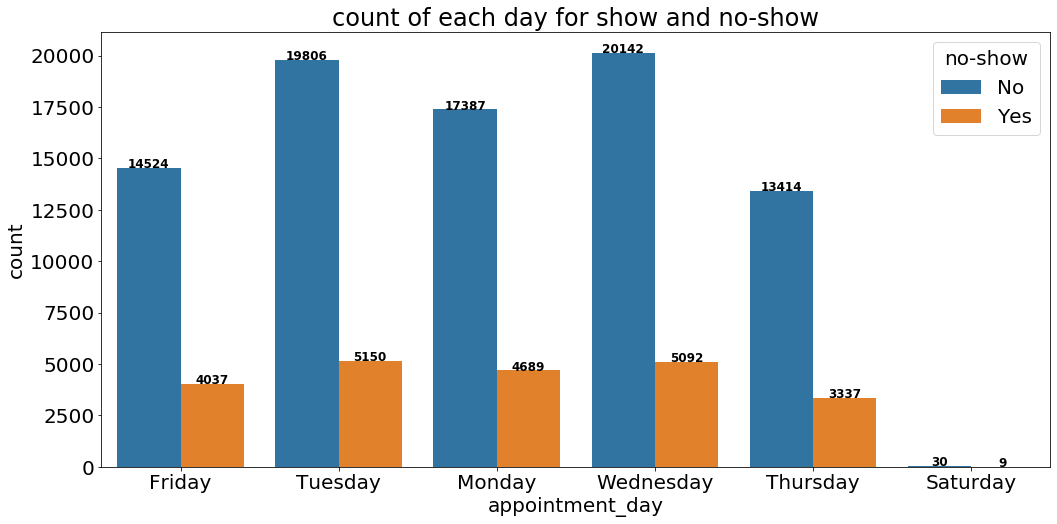

In [46]:
drow_count('appointment_day')
plt.title('count of each day for show and no-show')

> as i did with gender to find the ratio i will do the same so i can get the ratio of each day and show

In [47]:
appointment_day_count_df=df.groupby(['appointment_day','no-show'])['no-show'].size().unstack()
appointment_day_count_df

no-show,No,Yes
appointment_day,,
Friday,14524,4037
Monday,17387,4689
Saturday,30,9
Thursday,13414,3337
Tuesday,19806,5150
Wednesday,20142,5092


In [48]:
appointment_ratio = ((appointment_day_count_df*100)/(appointment_day_count_df.values.sum(axis=1).reshape(-1,1)))
appointment_ratio

no-show,No,Yes
appointment_day,,
Friday,78.250094,21.749906
Monday,78.759739,21.240261
Saturday,76.923077,23.076923
Thursday,80.078801,19.921199
Tuesday,79.363680,20.636320
Wednesday,79.820877,20.179123


In [49]:
appointment_ratio = ((appointment_day_count_df*100)/(appointment_day_count_df.values.sum(axis=0)))
appointment_ratio

no-show,No,Yes
appointment_day,,
Friday,17.026365,18.091781
Monday,20.382636,21.013713
Saturday,0.035169,0.040333
Thursday,15.725121,14.954737
Tuesday,23.218410,23.079681
Wednesday,23.612300,22.819754


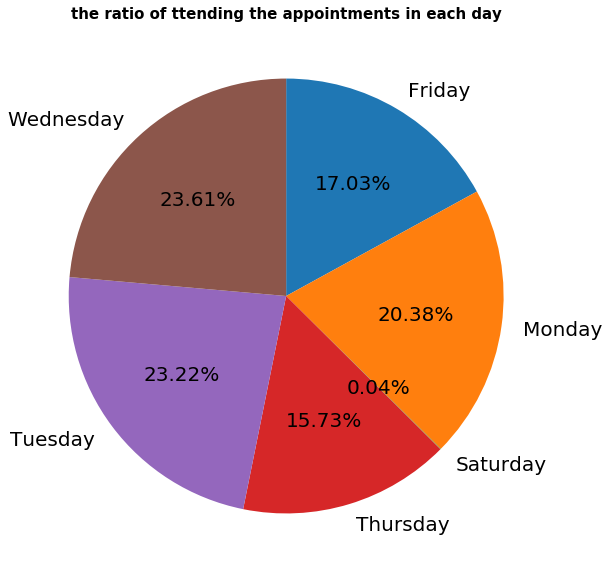

In [50]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.pie(appointment_ratio['No'].values,autopct='%.2f%%',labels=appointment_ratio.index,startangle=90,counterclock=False);
ax.set_title('the ratio of ttending the appointments in each day',fontsize=15,weight='bold');

> - as we excepected in the pie Wednesday is the most day where people attendent they appointment with ratio = 23.6 %

> most pepole who had appointment at Thursday tend to show at they appintment with ratio = 80 % 

### Research Question 5  (if sending a SMS has a relation with no to show!)

In [51]:
df['sms_received'].value_counts()

0    72817
1    34800
Name: sms_received, dtype: int64

Text(0.5, 1.0, 'count of resiveing msg for show and no-show')

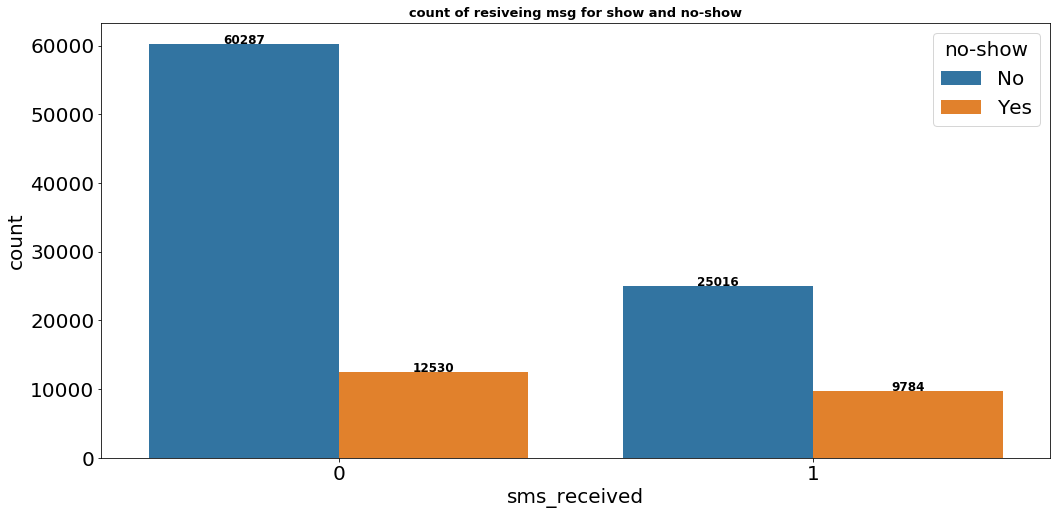

In [52]:
drow_count('sms_received')
plt.title('count of resiveing msg for show and no-show',fontsize=13,weight='bold')

In [53]:
msg=df.groupby(['sms_received','no-show'])['no-show'].size().unstack()
msg

no-show,No,Yes
sms_received,,
0,60287,12530
1,25016,9784


In [54]:
msg_ratio = ((msg*100)/(msg.values.sum(axis=1).reshape(-1,1)))
msg_ratio

no-show,No,Yes
sms_received,,
0,82.792480,17.207520
1,71.885057,28.114943


> from above we get that the peopel who did not recieve a msg are most to show for the appoinment which does not make sense
- let try to see msg with the gender

In [55]:
msg_gender=df.groupby(['sms_received','gender','no-show'])['no-show'].size().unstack()
msg_gender

no-show                 No   Yes
sms_received gender             
0            F       38693  7871
             M       21594  4659
1            F       17146  6720
             M        7870  3064

In [56]:
msg_gender_ratio = ((msg_gender*100)/(msg_gender.values.sum(axis=1).reshape(-1,1)))
msg_gender_ratio

no-show                     No        Yes
sms_received gender                      
0            F       83.096383  16.903617
             M       82.253457  17.746543
1            F       71.842789  28.157211
             M       71.977318  28.022682

> gender also does not have an affect and it also show that the peopele how did not receive msg are most to show even if it's female or male with ratio 83% , 82% 

### Research Question 6  (Scholarship relation with no to show!)

In [57]:
df['scholarship'].value_counts()

0    96801
1    10816
Name: scholarship, dtype: int64

Text(0.5, 1.0, 'count of scholarship for show and no-show')

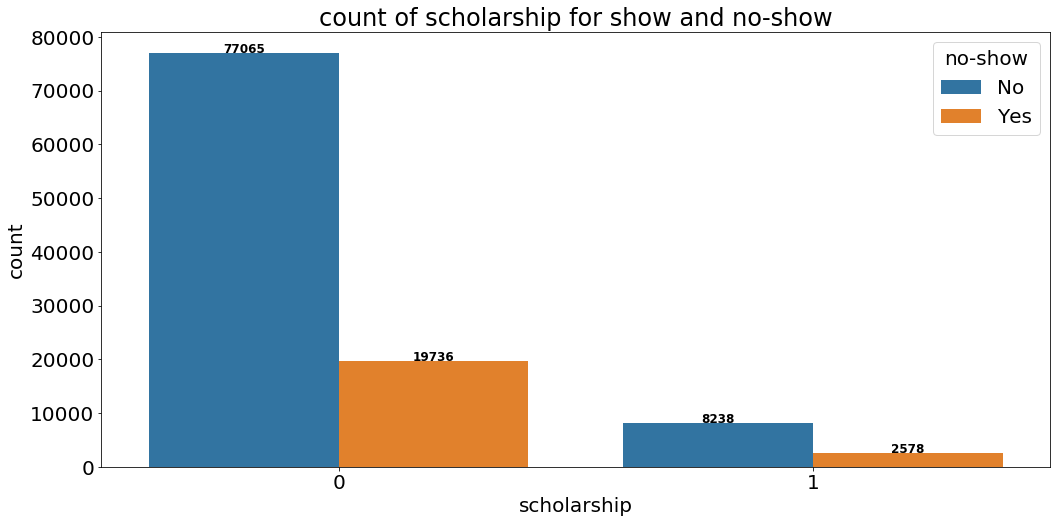

In [58]:
drow_count('scholarship')
plt.title('count of scholarship for show and no-show')

In [59]:
scholarship=df.groupby(['scholarship','no-show'])['no-show'].size().unstack()
scholarship

no-show,No,Yes
scholarship,,
0,77065,19736
1,8238,2578


In [60]:
scholarship_ratio = ((scholarship*100)/(scholarship.values.sum(axis=-1).reshape(-1,1)))
scholarship_ratio

no-show,No,Yes
scholarship,,
0,79.611781,20.388219
1,76.164941,23.835059


> pepole with no scholarship tend to show for there appointment more than the people with scholarship
- people with no scholarship has ratio to show with 79 % while the people with scholarship has ratio to show 76%  

In [61]:
scholarship=df.groupby(['scholarship','gender','no-show'])['no-show'].size().unstack()
scholarship

no-show                No    Yes
scholarship gender              
0           F       49116  12485
            M       27949   7251
1           F        6723   2106
            M        1515    472

Text(0.5, 1.0, 'count for scholarship for show and no-show')

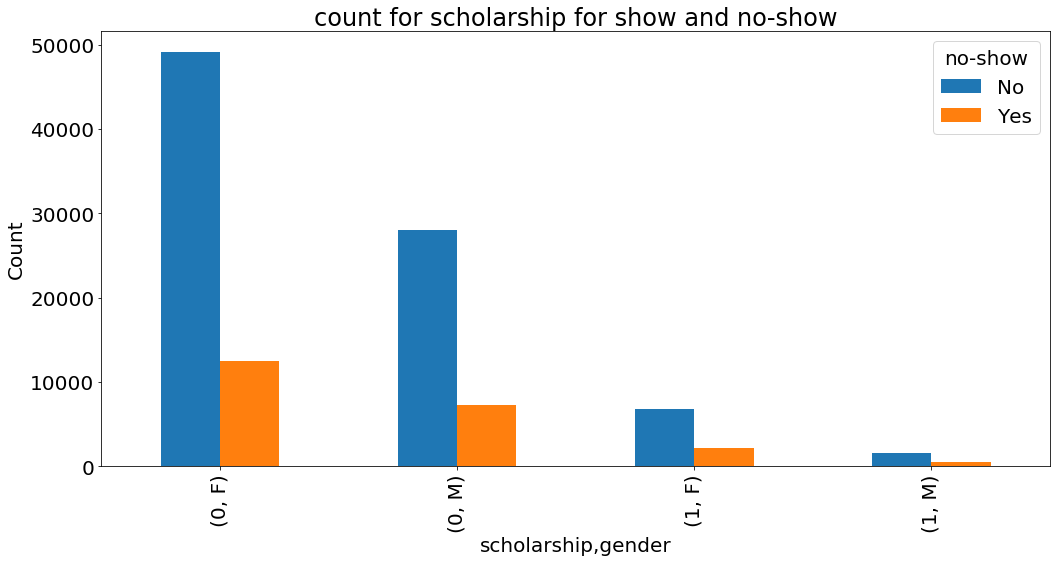

In [62]:
scholarship.plot(kind='bar');
plt.ylabel('Count')
plt.title('count for scholarship for show and no-show')

In [63]:
scholarship_ratio = ((scholarship*100)/(scholarship.values.sum(axis=1).reshape(-1,1)))
scholarship_ratio

no-show                    No        Yes
scholarship gender                      
0           F       79.732472  20.267528
            M       79.400568  20.599432
1           F       76.146789  23.853211
            M       76.245596  23.754404

> even with gender the insight is the same

### Research Question 7  (hipertension relation with no to show!)

In [64]:
df['hipertension'].value_counts()

0    85817
1    21800
Name: hipertension, dtype: int64

In [65]:
hipertension=df.groupby(['hipertension','no-show'])['no-show'].size().unstack()
hipertension

no-show,No,Yes
hipertension,,
0,67275,18542
1,18028,3772


In [66]:
hipertension_ratio = ((hipertension*100)/(hipertension.values.sum(axis=1).reshape(-1,1)))
hipertension_ratio

no-show,No,Yes
hipertension,,
0,78.393558,21.606442
1,82.697248,17.302752


> people with hipertension tend to show for there appointment
- here we have the people with hipertension tend to show for there appointment with ratio 82 % while people with no hipertension has show ratio of 78%

In [67]:
hipertension=df.groupby(['hipertension','gender','no-show'])['no-show'].size().unstack()
hipertension

no-show                 No    Yes
hipertension gender              
0            F       43158  11934
             M       24117   6608
1            F       12681   2657
             M        5347   1115

In [68]:
hipertension_ratio = ((hipertension*100)/(hipertension.values.sum(axis=1).reshape(-1,1)))
hipertension_ratio

no-show                     No        Yes
hipertension gender                      
0            F       78.338053  21.661947
             M       78.493084  21.506916
1            F       82.677011  17.322989
             M       82.745280  17.254720

> female or male people with hipertension tend to show to there appontment with ratio 83% for both gender

In [69]:
df['diabetes'].value_counts()

0    99674
1     7943
Name: diabetes, dtype: int64

In [70]:
diabetes=df.groupby(['diabetes','no-show'])['no-show'].size().unstack()
diabetes

no-show,No,Yes
diabetes,,
0,78790,20884
1,6513,1430


In [71]:
diabetes_ratio = ((diabetes*100)/(diabetes.values.sum(axis=1).reshape(-1,1)))
diabetes_ratio

no-show,No,Yes
diabetes,,
0,79.047695,20.952305
1,81.996727,18.003273


> we can get that people with diabetes has more chance to attend there appointment 
- people who has diabetes tend to show with ratio 81% while people with no diabetes tend to attend with ratio 79%

<a id='conclusions'></a>
## Conclusions



>- gender don't affect showing up because all the ratio are the same
- from age 1 to 50 there is more chance to not attend the oppointment
- but from 50 to 100 there is more chance to attend the oppointment
- the average age for attend is 39 and for not attend is 35
- there is no appointment at sunday
- wednesday is the day with the most appointment
- saturday is the day with the least appointment
- 70 % of people who show  don't receive a msg and from people who not show 56 % did not recieve a msg so we can't tell if receiving a msg affect 
- pepole with no scholarship tend to show for they appointment more than the people with scholarship
- people with hipertension tend to show for they appointment
- people with diabetes has more chance to attend they appointment

> ### Limitations
- Age column has alot of wrong data like large number of 0 values and it doesn't make sense according to the project ,and  impute all these number of wrong data may lead to bais  
- The data just has three months ( April, May, June)
- The msg column was missleading as it says that the people how receive a msg were most to not show which does not make sense
- Most of the variables are categorical, which doesn't allow for a high level of statistical method.